# 主旨
使用CRR計算歐式&美式障礙選擇權
1. 歐式障礙選擇權
    - 出局選擇權
    - 入局選擇權
2. 美式障礙選擇權
    - 出局選擇權
    - 入局選擇權
3. 驗證障礙選擇權計算是否正確
    - 歐式
    - 美式
4. CRR收斂情況

# 導入套件

In [1]:
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
import crr_funcs  # 自製使用CRR計算陽春美式option的函數，用於驗證

# 第一部份 歐式障礙選擇權

## 1-1 出局選擇權

### 1-1-1 歐式上出局買權 

In [2]:
def eu_up_out_call( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算歐式上出局買權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        call_price : 歐式上出局買權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [0]*(n+1)  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1)  :  # i控制股價情境(第t=T=n期有t+1=n+1個情境)
        if ST >= H  : # 若股價觸碰到障礙價格
            option_value[i] = 0  # option出局
        else :
            option_value[i] = max( ST - K, 0 )
        ST *= d * d  # 計算下個迴圈的ST(ST=第n期股價，ST*d=第n-1期股價，ST*d*d=第n期下跌股價)
    
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :  # 從第n-1期向前計算至第0期，每次往前一期
        St = S0 * u**t  # 計算第t期下跌次數=0的股價
        for i in range(t+1) : # i控制股價情境(第t期有t+1個股價情境)
            if St >= H :  # 若股價觸碰到障礙價格
                option_value[i] = 0  # option出局
            else : 
                option_value[i] = discount_factor * ( option_value[i]*prob + option_value[i+1]*(1-prob) )
            St *= d * d  # 計算下個迴圈的St(St=第t期股價，St*d=第t-1期股價，St*d*d=第t期下跌股價)
    call_price = option_value[0]
    
    return call_price

eu_up_out_call( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=150 )

9.970522921901265

### 1-1-2 歐式上出局賣權

In [3]:
def eu_up_out_put( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算歐式上出局賣權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        put_price : 歐式上出局賣權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [0]*(n+1)  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1)  :  # i控制股價情境(第t=T=n期有t+1=n+1個情境)
        if ST >= H  : # 若股價觸碰到障礙價格
            option_value[i] = 0  # option出局
        else :
            option_value[i] = max( K - ST, 0 )
        ST *= d * d  # 計算下個迴圈的ST(ST=第n期股價，ST*d=第n-1期股價，ST*d*d=第n期下跌股價)
    
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :  # 從第n-1期向前計算至第0期，每次往前一期
        St = S0 * u**t  # 計算第t期下跌次數=0的股價
        for i in range(t+1) : # i控制股價情境(第t期有t+1個股價情境)
            if St >= H :  # 若股價觸碰到障礙價格
                option_value[i] = 0  # option出局
            else : 
                option_value[i] = discount_factor * ( option_value[i]*prob + option_value[i+1]*(1-prob) )
            St *= d * d  # 計算下個迴圈的St(St=第t期股價，St*d=第t-1期股價，St*d*d=第t期下跌股價)

    put_price = option_value[0]
    
    return put_price

eu_up_out_put( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=130 )

5.093465371972652

### 1-1-3 歐式下出局買權

In [4]:
def eu_down_out_call( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算歐式下出局買權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        call_price : 歐式下出局買權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [0]*(n+1)  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1)  :  # i控制股價情境(第t=T=n期有t+1=n+1個情境)
        if ST <= H  : # 若股價觸碰到障礙價格
            option_value[i] = 0  # option出局
        else :
            option_value[i] = max( ST - K, 0 )
        ST *= d * d  # 計算下個迴圈的ST(ST=第n期股價，ST*d=第n-1期股價，ST*d*d=第n期下跌股價)
    
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :  # 從第n-1期向前計算至第0期，每次往前一期
        St = S0 * u**t  # 計算第t期下跌次數=0的股價
        for i in range(t+1) : # i控制股價情境(第t期有t+1個股價情境)
            if St <= H :  # 若股價觸碰到障礙價格
                option_value[i] = 0  # option出局
            else : 
                option_value[i] = discount_factor * ( option_value[i]*prob + option_value[i+1]*(1-prob) )
            St *= d * d  # 計算下個迴圈的St(St=第t期股價，St*d=第t-1期股價，St*d*d=第t期下跌股價)   
        
    call_price = option_value[0]
    
    return call_price

eu_down_out_call( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=90 )

9.970522921901265

### 1-1-4 歐式下出局賣權

In [5]:
def eu_down_out_put( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算歐式下出局賣權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        put_price : 歐式下出局賣權價格，type=np.float64
    ''' 
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [0]*(n+1)  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1)  :  # i控制股價情境(第t=T=n期有t+1=n+1個情境)
        if ST <= H  : # 若股價觸碰到障礙價格
            option_value[i] = 0  # option出局
        else :
            option_value[i] = max( K - ST, 0 )
        ST *= d * d  # 計算下個迴圈的ST(ST=第n期股價，ST*d=第n-1期股價，ST*d*d=第n期下跌股價)
    
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :  # 從第n-1期向前計算至第0期，每次往前一期
        St = S0 * u**t  # 計算第t期下跌次數=0的股價
        for i in range(t+1) : # i控制股價情境(第t期有t+1個股價情境)
            if St <= H :  # 若股價觸碰到障礙價格
                option_value[i] = 0  # option出局
            else : 
                option_value[i] = discount_factor * ( option_value[i]*prob + option_value[i+1]*(1-prob) )
            St *= d * d  # 計算下個迴圈的St(St=第t期股價，St*d=第t-1期股價，St*d*d=第t期下跌股價)

    put_price = option_value[0]
    
    return put_price

eu_down_out_put( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=70 )

3.662378113378874

## 1-2 入局選擇權

- 入局寫法不能向上方出局那樣寫，若按照上方出局的寫法，只有期初沒有入局，option_value勢必=0(因上方在if中強制塞0)

### 1-2-1 歐式上入局買權

In [6]:
def eu_up_in_call( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算歐式上入局買權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        call_price : 歐式上入局買權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [ [0]*2 for _ in range(n+1) ]  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1) :
        option_value[i][0] = 0  # 計算未曾觸碰過障礙價格(H)的履約價值(未入局)
        option_value[i][1] = max( ST - K, 0 )  # 計算曾觸碰過障礙價格(H)的履約價值(入局)
        ST *= d*d
        
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :
        St = S0 * u**t
        for i in range(t+1) :
            if St >= H :  # Case1 : 當前股價<=H(入局)
                option_value[i][0] = 0  
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            elif St*u >= H :  # Case2 : 當前股價<H(未入局)，但下一期上漲股價入局
                option_value[i][0] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][0]*(1-prob) )
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            else :  # Case 3 : 未來上漲股價<H (未入局)
                option_value[i][0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][0]*(1-prob) )
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            St *= d*d
    
    # 判斷期初option是否已入局
    if S0 < H :  # 未入局    
        call_price = option_value[0][0]
    else :  # 入局
        call_price = option_value[0][1]
    
    return call_price

eu_up_in_call( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=130)

5.428029494247695

### 1-2-2 歐式上入局賣權

In [7]:
def eu_up_in_put( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算歐式上入局賣權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        put_price : 歐式上入局賣權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [ [0]*2 for _ in range(n+1) ]  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1) :
        option_value[i][0] = 0  # 計算未曾觸碰過障礙價格(H)的履約價值(未入局)
        option_value[i][1] = max( K - ST, 0 )  # 計算曾觸碰過障礙價格(H)的履約價值(入局)
        ST *= d*d
        
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :
        St = S0 * u**t
        for i in range(t+1) :
            if St >= H :  # Case1 : 當前股價>=H(入局)
                option_value[i][0] = 0  
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            elif St*u >= H :  # Case2 : 當前股價<H(未入局)，但下一期上漲股價入局
                option_value[i][0] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][0]*(1-prob) )
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            else :  # Case 3 : 未來上漲股價<H (未入局)
                option_value[i][0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][0]*(1-prob) )
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            St *= d*d
    
    # 判斷期初option是否已入局
    if S0 < H :  # 未入局    
        put_price = option_value[0][0]
    else :  # 入局
        put_price = option_value[0][1]
    
    return put_price

eu_up_in_put( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=90)

5.093465371972652

### 1-2-3 歐式下入局買權

In [8]:
def eu_down_in_call( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算歐式下入局買權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        call_price : 歐式下入局買權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [ [0]*2 for _ in range(n+1) ]  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1) :
        option_value[i][0] = 0  # 計算未曾觸碰過障礙價格(H)的履約價值(未入局)
        option_value[i][1] = max( ST - K, 0 )  # 計算曾觸碰過障礙價格(H)的履約價值(入局)
        ST *= d*d   
        
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :
        St = S0 * u**t
        for i in range(t+1) :
            if St <= H :  # Case1 : 當前股價<=H(入局)
                option_value[i][0] = 0  
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            elif St*d <= H :  # Case2 : 當前股價>H(未入局)，但下一期下跌股價入局
                option_value[i][0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][1]*(1-prob) )
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            else :  # Case 3 : 未來下跌股價>H (未入局)
                option_value[i][0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][0]*(1-prob) )
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            St *= d*d
    
    # 判斷期初option是否已入局
    if S0 > H :  # 未入局    
        call_price = option_value[0][0]
    else :  # 入局
        call_price = option_value[0][1]
    
    return call_price

eu_down_in_call( S0=100, K=80, r=0.05, T=1.0, n=4, sigma=0.2, H=90)

1.55391569514905

### 1-2-4 歐式下入局賣權

In [9]:
def eu_down_in_put( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算歐式下入局賣權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        put_price : 歐式下入局賣權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [ [0]*2 for _ in range(n+1) ]  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1) :
        option_value[i][0] = 0  # 計算未曾觸碰過障礙價格(H)的履約價值(未入局)
        option_value[i][1] = max( K - ST, 0 )  # 計算曾觸碰過障礙價格(H)的履約價值(入局)
        ST *= d*d   
        
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :
        St = S0 * u**t
        for i in range(t+1) :
            if St <= H :  # Case1 : 當前股價<=H(入局)
                option_value[i][0] = 0  
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            elif St*d <= H :  # Case2 : 當前股價>H(未入局)，但下一期下跌股價入局
                option_value[i][0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][1]*(1-prob) )
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            else :  # Case 3 : 未來下跌股價>H (未入局)
                option_value[i][0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][0]*(1-prob) )
                option_value[i][1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
            St *= d*d
    
    # 判斷期初option是否已入局
    if S0 > H :  # 未入局    
        put_price = option_value[0][0]
    else :  # 入局
        put_price = option_value[0][1]
    
    return put_price

eu_down_in_put( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=90)

5.093465371972652

# 第二部分 美式選擇權

## 2-1 出局選擇權

### 2-1-1 美式上出局買權

In [10]:
def us_up_out_call( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算美式上出局買權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        call_price : 美式上出局買權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [0]*(n+1)  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1)  :  # i控制股價情境(第t=T=n期有t+1=n+1個情境)
        if ST >= H  : # 若股價觸碰到障礙價格
            option_value[i] = 0  # option出局
        else :
            option_value[i] = max( ST - K, 0 )
        ST *= d * d  # 計算下個迴圈的ST(ST=第n期股價，ST*d=第n-1期股價，ST*d*d=第n期下跌股價)
    
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :  # 從第n-1期向前計算至第0期，每次往前一期
        St = S0 * u**t  # 計算第t期下跌次數=0的股價
        for i in range(t+1) : # i控制股價情境(第t期有t+1個股價情境)
            if St >= H :  # 若股價觸碰到障礙價格
                option_value[i] = 0  # option出局
            else : 
                expect_value = discount_factor * ( option_value[i]*prob + option_value[i+1]*(1-prob) )  # 選擇權期望價值
                exercise_value = St - K  # 選擇權履約價值
                option_value[i] = max(expect_value, exercise_value)  # 當期option價值
            St *= d * d  # 計算下個迴圈的St(St=第t期股價，St*d=第t-1期股價，St*d*d=第t期下跌股價)
    call_price = option_value[0]
    
    return call_price

us_up_out_call( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=130 )

9.274024090126535

### 2-1-2 美式上出局賣權

In [11]:
def us_up_out_put( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算美式上出局賣權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        put_price : 美式上出局賣權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [0]*(n+1)  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1)  :  # i控制股價情境(第t=T=n期有t+1=n+1個情境)
        if ST >= H  : # 若股價觸碰到障礙價格
            option_value[i] = 0  # option出局
        else :
            option_value[i] = max( K - ST, 0 )
        ST *= d * d  # 計算下個迴圈的ST(ST=第n期股價，ST*d=第n-1期股價，ST*d*d=第n期下跌股價)
    
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :  # 從第n-1期向前計算至第0期，每次往前一期
        St = S0 * u**t  # 計算第t期下跌次數=0的股價
        for i in range(t+1) : # i控制股價情境(第t期有t+1個股價情境)
            if St >= H :  # 若股價觸碰到障礙價格
                option_value[i] = 0  # option出局
            else : 
                expect_value = discount_factor * ( option_value[i]*prob + option_value[i+1]*(1-prob) )  # 選擇權期望價值
                exercise_value = K - St  # 選擇權履約價值
                option_value[i] = max(expect_value, exercise_value)  # 當期option價值
            St *= d * d  # 計算下個迴圈的St(St=第t期股價，St*d=第t-1期股價，St*d*d=第t期下跌股價)

    put_price = option_value[0]
    
    return put_price

us_up_out_put( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=130 )

5.882800351329434

### 2-1-3 美式下出局買權

In [12]:
def us_down_out_call( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算美式下出局買權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        call_price : 美式下出局買權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [0]*(n+1)  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1)  :  # i控制股價情境(第t=T=n期有t+1=n+1個情境)
        if ST <= H  : # 若股價觸碰到障礙價格
            option_value[i] = 0  # option出局
        else :
            option_value[i] = max( ST - K, 0 )
        ST *= d * d  # 計算下個迴圈的ST(ST=第n期股價，ST*d=第n-1期股價，ST*d*d=第n期下跌股價)
    
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :  # 從第n-1期向前計算至第0期，每次往前一期
        St = S0 * u**t  # 計算第t期下跌次數=0的股價
        for i in range(t+1) : # i控制股價情境(第t期有t+1個股價情境)
            if St <= H :  # 若股價觸碰到障礙價格
                option_value[i] = 0  # option出局
            else : 
                expect_value = discount_factor * ( option_value[i]*prob + option_value[i+1]*(1-prob) )  # 選擇權期望價值
                exercise_value = St - K  # 選擇權履約價值
                option_value[i] = max(expect_value, exercise_value)  # 當期option價值
            St *= d * d  # 計算下個迴圈的St(St=第t期股價，St*d=第t-1期股價，St*d*d=第t期下跌股價)   
        
    call_price = option_value[0]
    
    return call_price

us_down_out_call( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=90 )

9.970522921901265

### 2-1-4 美式下出局賣權

In [13]:
def us_down_out_put( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算美式下出局賣權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        put_price : 美式下出局賣權價格，type=np.float64
    ''' 
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [0]*(n+1)  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1)  :  # i控制股價情境(第t=T=n期有t+1=n+1個情境)
        if ST <= H  : # 若股價觸碰到障礙價格
            option_value[i] = 0  # option出局
        else :
            option_value[i] = max( K - ST, 0 )
        ST *= d * d  # 計算下個迴圈的ST(ST=第n期股價，ST*d=第n-1期股價，ST*d*d=第n期下跌股價)
    
    # 向前歸納計算選擇權價格
    for t in range(n-1, -1, -1) :  # 從第n-1期向前計算至第0期，每次往前一期
        St = S0 * u**t  # 計算第t期下跌次數=0的股價
        for i in range(t+1) : # i控制股價情境(第t期有t+1個股價情境)
            if St <= H :  # 若股價觸碰到障礙價格
                option_value[i] = 0  # option出局
            else : 
                expect_value = discount_factor * ( option_value[i]*prob + option_value[i+1]*(1-prob) )  # 選擇權期望價值
                exercise_value = K - St  # 選擇權履約價值
                option_value[i] = max(expect_value, exercise_value)  # 當期option價值
            St *= d * d  # 計算下個迴圈的St(St=第t期股價，St*d=第t-1期股價，St*d*d=第t期下跌股價)

    put_price = option_value[0]
    
    return put_price

us_down_out_put( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=70 )

5.882800351329434

## 2-2 入局選擇權

### 2-2-1 美式上入局買權

In [14]:
def us_up_in_call( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算美式上入局買權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        call_price : 美式上入局買權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [ [0]*2 for _ in range(n+1) ]  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1) :
        option_value[i][0] = 0  # 計算未曾觸碰過障礙價格(H)的履約價值(未入局)
        option_value[i][1] = max( ST - K, 0 )  # 計算曾觸碰過障礙價格(H)的履約價值(入局)
        ST *= d*d
        
    # 向前歸納計算選擇權價格
    expect_value = [0,0]  # index=0存入「未曾」觸碰過障礙價格(H)的option期望價值；index=1則是存放「曾經」
    for t in range(n-1, -1, -1) :
        St = S0 * u**t
        for i in range(t+1) :
            if St >= H :  # Case1 : 當前股價>=H(入局)
                # 履約價值
                excercise_value = St - K
                # 期望價值
                expect_value[0] = 0  
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = 0
                option_value[i][1] = max(excercise_value, expect_value[1])
                
            elif St*u >= H :  # Case2 : 當前股價<H(未入局)，但下一期上漲股價入局
                # 履約價值
                excercise_value = 0  # 未入局
                # 期望價值
                expect_value[0] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][0]*(1-prob) )
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = max(excercise_value, expect_value[0])
                option_value[i][1] = max(excercise_value, expect_value[1])
            else :  # Case 3 : 未來上漲股價<H (未入局)
                # 履約價值
                excercise_value = 0  # 未入局
                # 期望價值
                expect_value[0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][0]*(1-prob) )
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = max(excercise_value, expect_value[0])
                option_value[i][1] = max(excercise_value, expect_value[1])
            St *= d*d
    
    # 判斷期初option是否已入局
    if S0 < H :  # 未入局    
        call_price = option_value[0][0]
    else :  # 入局
        call_price = option_value[0][1]
    
    return call_price

us_up_in_call( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=130)

5.428029494247695

### 2-2-2 美式上入局賣權

In [15]:
def us_up_in_put( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算美式上入局賣權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        put_price : 美式上入局賣權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [ [0]*2 for _ in range(n+1) ]  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1) :
        option_value[i][0] = 0  # 計算未曾觸碰過障礙價格(H)的履約價值(未入局)
        option_value[i][1] = max( K - ST, 0 )  # 計算曾觸碰過障礙價格(H)的履約價值(入局)
        ST *= d*d
        
    # 向前歸納計算選擇權價格
    expect_value = [0,0]  # index=0存入「未曾」觸碰過障礙價格(H)的option期望價值；index=1則是存放「曾經」
    for t in range(n-1, -1, -1) :
        St = S0 * u**t
        for i in range(t+1) :
            if St >= H :  # Case1 : 當前股價>=H(入局)
                # 履約價值
                excercise_value = K - St
                # 期望價值
                expect_value[0] = 0  
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = 0
                option_value[i][1] = max(excercise_value, expect_value[1])
                
            elif St*u >= H :  # Case2 : 當前股價<H(未入局)，但下一期上漲股價入局
                # 履約價值
                excercise_value = 0  # 未入局
                # 期望價值
                expect_value[0] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][0]*(1-prob) )
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = max(excercise_value, expect_value[0])
                option_value[i][1] = max(excercise_value, expect_value[1])
            else :  # Case 3 : 未來上漲股價<H (未入局)
                # 履約價值
                excercise_value = 0  # 未入局
                # 期望價值
                expect_value[0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][0]*(1-prob) )
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = max(excercise_value, expect_value[0])
                option_value[i][1] = max(excercise_value, expect_value[1])
            St *= d*d
    
    # 判斷期初option是否已入局
    if S0 < H :  # 未入局    
        put_price = option_value[0][0]
    else :  # 入局
        put_price = option_value[0][1]
    
    return put_price

us_up_in_put( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=90)

5.505852802146527

### 2-2-3 美式下入局買權

In [16]:
def us_down_in_call( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算美式下入局買權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        call_price : 美式下入局買權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [ [0]*2 for _ in range(n+1) ]  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1) :
        option_value[i][0] = 0  # 計算未曾觸碰過障礙價格(H)的履約價值(未入局)
        option_value[i][1] = max( ST - K, 0 )  # 計算曾觸碰過障礙價格(H)的履約價值(入局)
        ST *= d*d   
        
    # 向前歸納計算選擇權價格
    expect_value = [0,0]  # index=0存入「未曾」觸碰過障礙價格(H)的option期望價值；index=1則是存放「曾經」
    for t in range(n-1, -1, -1) :
        St = S0 * u**t
        for i in range(t+1) :
            if St <= H :  # Case1 : 當前股價<=H(入局)
                # 履約價值
                excercise_value = St - K
                # 期望價值
                expect_value[0] = 0  
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = 0
                option_value[i][1] = max(excercise_value, expect_value[1])
            elif St*d <= H :  # Case2 : 當前股價>H(未入局)，但下一期下跌股價入局
                # 履約價值
                excercise_value = 0  # 未入局
                # 期望價值
                expect_value[0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][1]*(1-prob) )
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = max(excercise_value, expect_value[0])
                option_value[i][1] = max(excercise_value, expect_value[1])
            else :  # Case 3 : 未來下跌股價>H (未入局)
                # 履約價值
                excercise_value = 0  # 未入局
                # 期望價值
                expect_value[0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][0]*(1-prob) )
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = max(excercise_value, expect_value[0])
                option_value[i][1] = max(excercise_value, expect_value[1])
            St *= d*d
    
    # 判斷期初option是否已入局
    if S0 > H :  # 未入局    
        call_price = option_value[0][0]
    else :  # 入局
        call_price = option_value[0][1]
    
    return call_price

us_down_in_call( S0=100, K=80, r=0.05, T=1.0, n=4, sigma=0.2, H=90)

1.55391569514905

### 2-2-4 美式下入局賣權

In [17]:
def us_down_in_put( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float ) -> np.float64 : 
    '''
    功能 : 計算美式下入局賣權價格
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
    輸出 :
        put_price : 美式下入局賣權價格，type=np.float64
    '''
    # 計算相關參數
    dt = T / n  # 每一期間隔時間
    u = np.exp( sigma * np.sqrt(dt) )  # 漲幅
    d = 1 / u  # 跌幅
    prob = ( np.exp(r*dt) - d ) / (u - d)  # 股價上漲的風險中立機率
    discount_factor = np.exp(-r*dt)  # 折現因子
    
    # 計算選擇權期末payoff
    ST = S0 * u**n  # 期末(t=T=n)下跌次數=0的股價(一直上漲情境)
    option_value = [ [0]*2 for _ in range(n+1) ]  # 建構(n+1)*1的list，盛裝第t期下每個股價情境(t+1的情境)的選擇權payoff
    for i in range(n+1) :
        option_value[i][0] = 0  # 計算未曾觸碰過障礙價格(H)的履約價值(未入局)
        option_value[i][1] = max( K - ST, 0 )  # 計算曾觸碰過障礙價格(H)的履約價值(入局)
        ST *= d*d   
        
    # 向前歸納計算選擇權價格
    expect_value = [0,0]  # index=0存入「未曾」觸碰過障礙價格(H)的option期望價值；index=1則是存放「曾經」
    for t in range(n-1, -1, -1) :
        St = S0 * u**t
        for i in range(t+1) :
            if St <= H :  # Case1 : 當前股價<=H(入局)
                # 履約價值
                excercise_value = K - St
                # 期望價值
                expect_value[0] = 0  
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = 0
                option_value[i][1] = max(excercise_value, expect_value[1])
            elif St*d <= H :  # Case2 : 當前股價>H(未入局)，但下一期下跌股價入局
                # 履約價值
                excercise_value = 0  # 未入局
                # 期望價值
                expect_value[0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][1]*(1-prob) )
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = max(excercise_value, expect_value[0])
                option_value[i][1] = max(excercise_value, expect_value[1])
            else :  # Case 3 : 未來下跌股價>H (未入局)
                # 履約價值
                excercise_value = 0  # 未入局
                # 期望價值
                expect_value[0] = discount_factor * ( option_value[i][0]*prob + option_value[i+1][0]*(1-prob) )
                expect_value[1] = discount_factor * ( option_value[i][1]*prob + option_value[i+1][1]*(1-prob) )
                # option當期價值
                option_value[i][0] = max(excercise_value, expect_value[0])
                option_value[i][1] = max(excercise_value, expect_value[1])
            St *= d*d
    
    # 判斷期初option是否已入局
    if S0 > H :  # 未入局    
        put_price = option_value[0][0]
    else :  # 入局
        put_price = option_value[0][1]
    
    return put_price

us_down_in_put( S0=100, K=100, r=0.05, T=1.0, n=4, sigma=0.2, H=90)

5.607875397880182

# 第三部分 驗證障礙選擇權計算是否正確

## 3-1 歐式選擇權
驗證方法 : 若計算正確，下方等式應成立(一般option用Black-Sholes model計算)
1. 上出局call + 上入局call = 一般call
2. 上出局put + 上入局put = 一般put
3. 下出局call + 下入局call = 一般call
4. 下出局put + 下入局put = 一般put

In [18]:
def BS_option( S0:float, K:float, r:float, T:float, sigma:float, option : str ) -> np.float64 :
    '''
    功能 : 使用Black-Sholes model計算歐式選擇權價格
    輸入 : 
    1. S0 : 期初股價，type=float
    2. K : 履約價，type=float
    3. r : 無風險利率，type=float
    4. T : 到期期限(單位:年)，type=float
    5. sigma : 波動度，type=float
    6. option : 計算買權or賣權，只能輸入「call」或「put」，type=str
    '''
    #   設定參數   #
    d1 = (np.log(S0/K) + (r+sigma**2/2)*T )/sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)      
    N_d1 = norm.cdf(d1)  # 標準常態分配之累積機率
    N_d2 = norm.cdf(d2)
    n_N_d1 = norm.cdf(-d1)  
    n_N_d2 = norm.cdf(-d2)

    #   Black-Scholes Model   #  
    call = S0 * N_d1 - K * np.exp(-r*T) * N_d2  # 以BS Model 計算之歐式買權價格
    put = K * np.exp(-r*T) * n_N_d2 - S0 * n_N_d1  # 以BS Model 計算之歐式賣權價格

    # 判斷計算call or put
    if option == 'call' :
        option_price = call
    elif option == 'put' : 
        option_price = put
    else : 
        print( 'option只能輸入「call」或「put」' )
        
    return option_price

### 3-1-1  驗證上方買權

In [19]:
a = eu_up_out_call( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=150 )
b = eu_up_in_call( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=150)
BS_call = BS_option( S0=100, K=100, r=0.05, T=1.0, sigma=0.2, option='call' )
print(f'上出局call = {a}')
print(f'上入局call = {b}')
print(f'上出局 + 上入局call = {a+b}')
print(f'使用Black-Sholes model計算的call = {BS_call}')

上出局call = 7.756338590436019
上入局call = 2.692245513327412
上出局 + 上入局call = 10.44858410376343
使用Black-Sholes model計算的call = 10.450583572185565


### 3-1-2  驗證上方賣權

In [20]:
a = eu_up_out_put( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=120 )
b = eu_up_in_put( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=120)
BS_put = BS_option( S0=100, K=100, r=0.05, T=1.0, sigma=0.2, option='put' )
print(f'上出局put = {a}')
print(f'上入局put = {b}')
print(f'上出局 + 上入局put = {a+b}')
print(f'使用Black-Sholes model計算的put = {BS_put}')

上出局put = 5.364510164796433
上入局put = 0.20701638903797262
上出局 + 上入局put = 5.571526553834405
使用Black-Sholes model計算的put = 5.573526022256971


### 3-1-3  驗證下方買權

In [21]:
a = eu_down_out_call( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=80 )
b = eu_down_in_call( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=80)
BS_call = BS_option( S0=100, K=100, r=0.05, T=1.0, sigma=0.2, option='call' )
print(f'下出局call = {a}')
print(f'下入局call = {b}')
print(f'下出局 + 下入局call = {a+b}')
print(f'使用Black-Sholes model計算的call = {BS_call}')

下出局call = 10.362167565447303
下入局call = 0.08641653831612854
下出局 + 下入局call = 10.448584103763432
使用Black-Sholes model計算的call = 10.450583572185565


### 3-1-4  驗證下方賣權

In [22]:
a = eu_down_out_put( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=80 )
b = eu_down_in_put( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=80)
BS_put = BS_option( S0=100, K=100, r=0.05, T=1.0, sigma=0.2, option='put' )
print(f'下出局put = {a}')
print(f'下入局put = {b}')
print(f'下出局 + 下入局put = {a+b}')
print(f'使用Black-Sholes model計算的put = {BS_put}')

下出局put = 1.6999021664349305
下入局put = 3.871624387399475
下出局 + 下入局put = 5.571526553834405
使用Black-Sholes model計算的put = 5.573526022256971


## 3-2 美式選擇權
驗證方法 : 若計算正確，下方等式應成立(一般option用CRR model計算)
1. 上出局call + 上入局call = 一般call
2. 上出局put + 上入局put = 一般put
3. 下出局call + 下入局call = 一般call
4. 下出局put + 下入局put = 一般put

### 3-2-1 上方買權

In [32]:
a = us_up_out_call( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=150 )
b = us_up_in_call( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=150)
vanilla_call = crr_funcs.American_call( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2 )  # 自製使用CRR計算陽春美式option的函數
print(f'上出局call = {a}')
print(f'上入局call = {b}')
print(f'上出局 + 上入局call = {a+b}')
print(f'使用CRR model計算的vanilla call = {vanilla_call}')

上出局call = 10.379289679383515
上入局call = 2.692245513327412
上出局 + 上入局call = 13.071535192710927
使用CRR model計算的vanilla call = 10.448584103764665


### 3-2-2 上方賣權

In [40]:
a = us_up_out_put( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=120 )
b = us_up_in_put( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=120)
vanilla_put = crr_funcs.American_put( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2 )
print(f'上出局put = {a}')
print(f'上入局put = {b}')
print(f'上出局 + 上入局put = {a+b}')
print(f'使用CRR model計算的vanilla put = {vanilla_put}')

上出局put = 5.874678698410909
上入局put = 0.20701638903797262
上出局 + 上入局put = 6.081695087448882
使用CRR model計算的vanilla put = 6.089595282977915


### 3-2-3 下方買權

In [25]:
a = us_down_out_call( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=70 )
b = us_down_in_call( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=70)
vanilla_call = crr_funcs.American_call( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2 )
print(f'下出局call = {a}')
print(f'下入局call = {b}')
print(f'下出局 + 下入局call = {a+b}')
print(f'使用CRR model計算的vanilla call = {vanilla_call}')

下出局call = 10.447787684793541
下入局call = 0.000796418969891472
下出局 + 下入局call = 10.448584103763432
使用CRR model計算的vanilla call = 10.448584103764665


### 3-2-4 下方賣權

In [34]:
a = us_down_out_put( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=70 )
b = us_down_in_put( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2, H=70)
vanilla_put = crr_funcs.American_put( S0=100, K=100, r=0.05, T=1.0, n=1000, sigma=0.2 )
print(f'下出局put = {a}')
print(f'下入局put = {b}')
print(f'下出局 + 下入局put = {a+b}')
print(f'使用CRR model計算的vanilla put = {vanilla_put}')

下出局put = 6.0895952829784905
下入局put = 1.5787351877057434
下出局 + 下入局put = 7.668330470684234
使用CRR model計算的vanilla put = 6.089595282977915


## 3-4 其他驗證方式
- 歐式call = 美式call
- 歐式put <= 美式put

### 3-4-1 買權

In [27]:
a = eu_up_in_call( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=130)
b = us_up_in_call( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=130)
c = eu_up_out_call( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=130)
d = us_up_out_call( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=130)
e = eu_down_in_call( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=70)
f = us_down_in_call( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=70)
g = eu_down_out_call( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=70)
h = us_down_out_call( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=70)
print(f'歐美式上入局買權差異 = {a-b}')  # 歐 - 美
print(f'歐美式上出局買權差異 = {c-d}')
print(f'歐美式下入局買權差異 = {e-f}')
print(f'歐美式下出局買權差異 = {g-h}')

歐美式上入局買權差異 = 0.0
歐美式上出局買權差異 = -6.157078806322438
歐美式下入局買權差異 = 0.0
歐美式下出局買權差異 = 0.0


### 3-4-2 賣權

In [67]:
a = eu_up_in_put( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=120)
b = us_up_in_put( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=120)
c = eu_up_out_put( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=120)
d = us_up_out_put( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=120)
e = eu_down_in_put( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=80)
f = us_down_in_put( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=80)
g = eu_down_out_put( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=80)
h = us_down_out_put( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=80)
print(f'歐美式上入局賣權差異 = {a-b}')  # 歐 - 美
print(f'歐美式上出局賣權差異 = {c-d}')
print(f'歐美式下入局賣權差異 = {e-f}')
print(f'歐美式下出局賣權差異 = {g-h}')

歐美式上入局賣權差異 = 0.0
歐美式上出局賣權差異 = -0.5233350973034065
歐美式下入局賣權差異 = -0.32287047298211746
歐美式下出局賣權差異 = -4.198639775467038


# 第四部分 CRR收斂情況

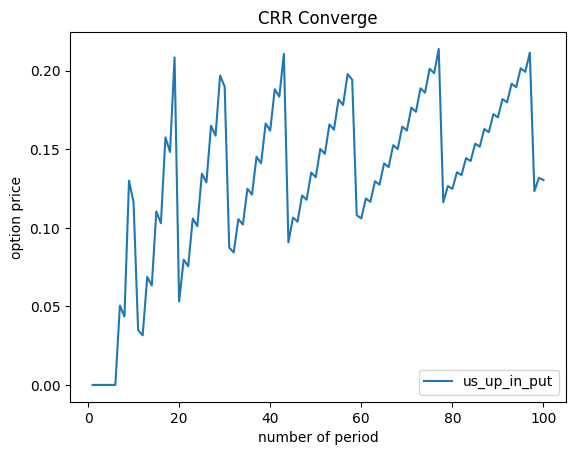

In [59]:
def plot_crr_converge( S0:float, K:float, r:float, T:float, n:int, sigma:float, H:float, option:str) :
    '''
    功能 : 畫CRR收斂圖
    輸入 : 
        1. S0 : 期初股價，type=float
        2. K : 履約價，type=float
        3. r : 無風險利率，type=float
        4. T : 到期期限(單位:年)，type=float
        5. n : 最大期數，type=int
        6. sigma : 波動度，type=float
        7. H : 障礙價格，type=float
        8. option : 選擇欲計算的選擇權，type=str
            只能輸入 : eu_up_in_call -> 歐式上入局買權，us_up_in_call -> 美式上入局買權
                      eu_up_in_put -> 歐式上入局賣權，us_up_in_put -> 美式上入局賣權
                      eu_up_out_call -> 歐式上出局買權，us_up_out_call -> 美式上出局買權
                      eu_up_out_put -> 歐式上出局賣權，us_up_out_put -> 美式上出局賣權
                      eu_down_in_call -> 歐式下入局買權，us_down_in_call -> 美式下入局買權
                      eu_down_in_put -> 歐式下入局賣權，us_down_in_put -> 美式下入局賣權
                      eu_down_out_call -> 歐式下出局買權，us_down_out_call -> 美式下出局買權
                      eu_down_out_put -> 歐式下出局賣權，us_down_out_put -> 美式下出局賣權
    '''
    # 計算option在不同n下的價格
    x_list = []
    y_list = []
    for i in range(1, n+1) :
        option_price = option(S0, K, r, T, i, sigma, H)
        x_list.append(i)
        y_list.append(option_price)
    
    # 畫圖
    plt.plot(x_list, y_list, label=option.__name__)
    plt.title('CRR Converge')
    plt.xlabel('number of period')
    plt.ylabel('option price')
    plt.legend(loc=0)
    
plot_crr_converge( S0=100, K=100, r=0.05, T=1.0, n=100, sigma=0.2, H=120, option=us_up_in_put)

### 鋸齒狀收斂
- 原因 : 使用二元樹(CRR)計算障礙價格時，有效障礙價格不一定能剛好切在樹的節點上
- 解決方法 : 改使用三元樹，相比二元樹，三元樹多一個自由度可以去控制樹擴張的大小，使每一期都有一個節點剛好落在有效障礙價格上